# **Differential Evolution Algorithm Phases**

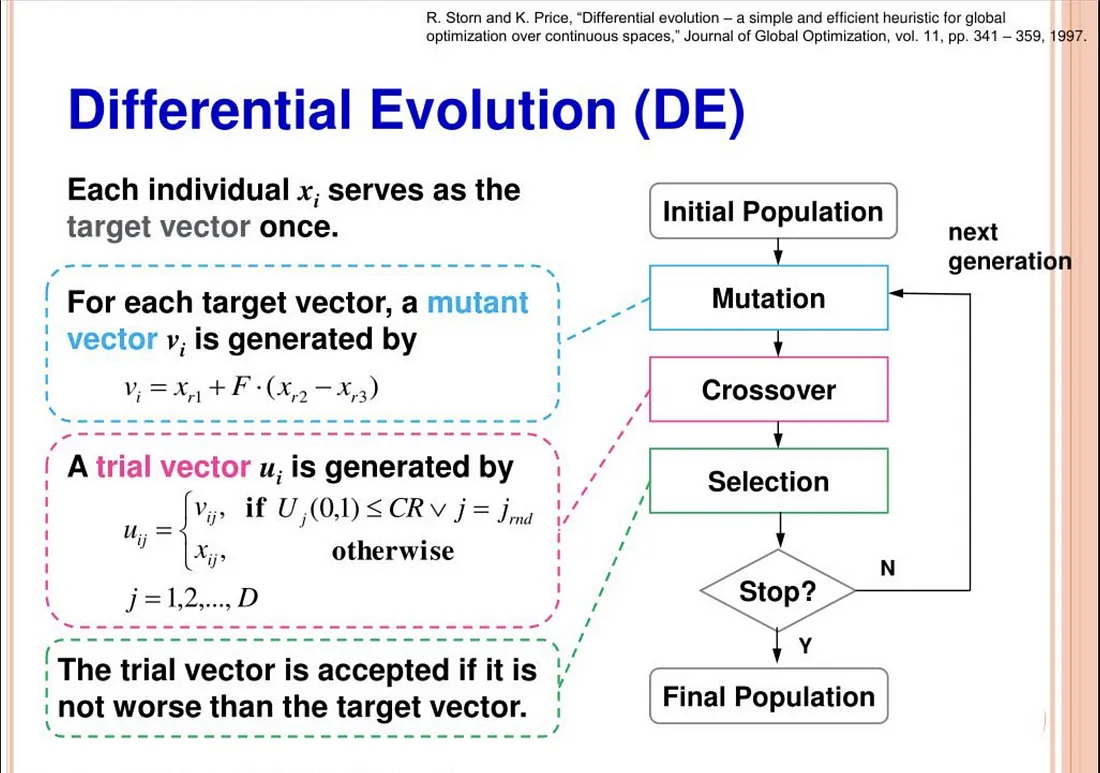

# **Differential Evolution Algorithm on the Rosenbrock Function**



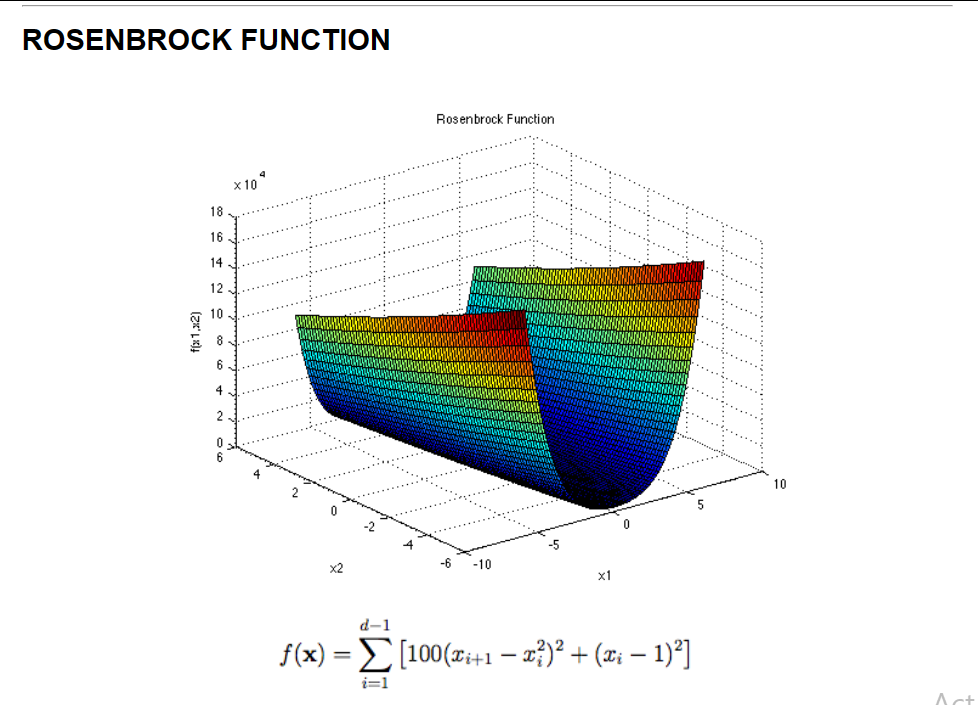

# **Load libraries**

In [1]:
from numpy.random import rand
from numpy.random import choice
from numpy import asarray
from numpy import clip
from numpy import argmin
from numpy import min
from numpy import around
import matplotlib.pyplot as plt

# **Define Rosenbrock objective function**

In [11]:
def rosenbrock(x):
    """Compute the Rosenbrock function."""
    x = np.asarray(x)  # Convert input to numpy array
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

# **Define mutation operation**

In [12]:
def mutation(x, F):
    return x[0] + F * (x[1] - x[2])

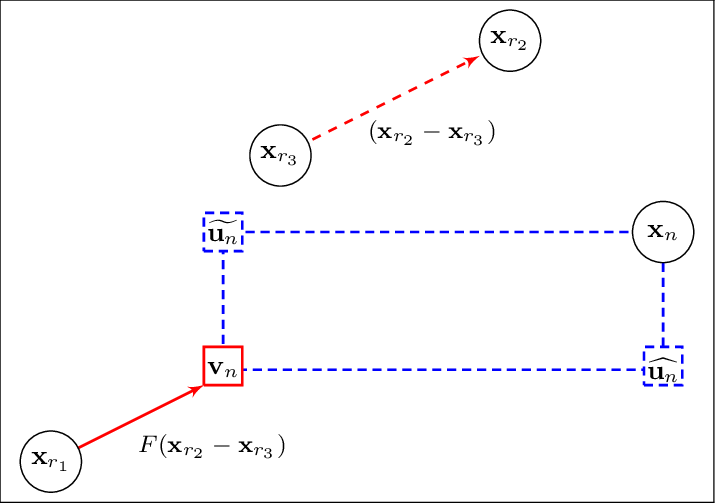

# **Define boundary check operation**

In [13]:
def check_bounds(mutated, bounds):
    mutated_bound = [np.clip(mutated[i], bounds[i, 0], bounds[i, 1]) for i in range(len(bounds))]
    return mutated_bound

# **Define crossover operation**

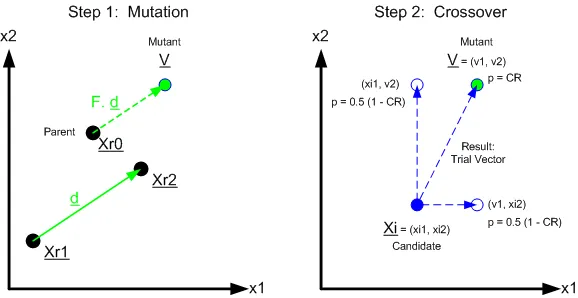

In [14]:
def crossover(mutated, target, dims, cr):
    p = np.random.rand(dims)
    trial = [mutated[i] if p[i] < cr else target[i] for i in range(dims)]
    return trial

# **Differential Evolution Function**

In [15]:
def differential_evolution(pop_size, bounds, iterations, F, cr):
    pop = bounds[:, 0] + (np.random.rand(pop_size, len(bounds)) * (bounds[:, 1] - bounds[:, 0]))
    obj_all = [rosenbrock(ind) for ind in pop]
    best_vector = pop[np.argmin(obj_all)]
    best_obj = np.min(obj_all)
    prev_obj = best_obj
    obj_iter = []

    for i in range(iterations):
        for j in range(pop_size):
            candidates = [candidate for candidate in range(pop_size) if candidate != j]
            a, b, c = pop[np.random.choice(candidates, 3, replace=False)]
            mutated = mutation([a, b, c], F)
            mutated = check_bounds(mutated, bounds)
            trial = crossover(mutated, pop[j], len(bounds), cr)
            obj_target = rosenbrock(pop[j])
            obj_trial = rosenbrock(trial)
            if obj_trial < obj_target:
                pop[j] = trial
                obj_all[j] = obj_trial

        best_obj = np.min(obj_all)
        if best_obj < prev_obj:
            best_vector = pop[np.argmin(obj_all)]
            prev_obj = best_obj
            obj_iter.append(best_obj)
            print('Iteration: %d, Best Objective: %.5f' % (i, best_obj))

    return [best_vector, best_obj, obj_iter]

In [10]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import numpy as np
import copy

In [30]:
def run_differential_evolution():
    pop_size = int(entry_pop_size.get())
    bounds_min = float(entry_bounds_min.get())
    bounds_max = float(entry_bounds_max.get())
    iterations = int(entry_iterations.get())
    F = float(entry_F.get())
    cr = float(entry_cr.get())

    bounds = np.array([[bounds_min, bounds_max], [bounds_min, bounds_max], [bounds_min, bounds_max]])

    solution = differential_evolution(pop_size, bounds, iterations, F, cr)

    # Plot convergence
    fig = Figure(figsize=(5, 4), dpi=100)
    plot = fig.add_subplot(1, 1, 1)
    plot.plot(solution[2], '.-')
    plot.set_xlabel('Iteration')
    plot.set_ylabel('Objective Value')
    plot.set_title('Convergence Plot')
    plot.grid(True)

    canvas = FigureCanvasTkAgg(fig, master=app)
    canvas.draw()
    canvas.get_tk_widget().grid(row=9, columnspan=4)

app = tk.Tk()
app.title("Differential Evolution for Rosenbrock Function")

label_pop_size = ttk.Label(app, text="Population Size:")
label_pop_size.grid(row=0, column=0)
entry_pop_size = ttk.Entry(app)
entry_pop_size.grid(row=0, column=1)

label_bounds = ttk.Label(app, text="Bounds (Min/Max):")
label_bounds.grid(row=1, column=0)
entry_bounds_min = ttk.Entry(app)
entry_bounds_min.grid(row=1, column=1)
entry_bounds_max = ttk.Entry(app)
entry_bounds_max.grid(row=1, column=2)

label_iterations = ttk.Label(app, text="Iterations:")
label_iterations.grid(row=2, column=0)
entry_iterations = ttk.Entry(app)
entry_iterations.grid(row=2, column=1)

label_F = ttk.Label(app, text="Scale Factor (F):")
label_F.grid(row=3, column=0)
entry_F = ttk.Entry(app)
entry_F.grid(row=3, column=1)

label_cr = ttk.Label(app, text="Crossover Rate (CR):")
label_cr.grid(row=4, column=0)
entry_cr = ttk.Entry(app)
entry_cr.grid(row=4, column=1)

btn_run = ttk.Button(app, text="Run Differential Evolution", command=run_differential_evolution)
btn_run.grid(row=5, columnspan=2, pady=10)

app.mainloop()

Iteration: 0, Best Objective: 35.18411
Iteration: 3, Best Objective: 3.87004
Iteration: 5, Best Objective: 3.75652
Iteration: 7, Best Objective: 2.38725
Iteration: 9, Best Objective: 0.92252
Iteration: 18, Best Objective: 0.91145
Iteration: 19, Best Objective: 0.11148
Iteration: 32, Best Objective: 0.01296
Iteration: 51, Best Objective: 0.00563
Iteration: 55, Best Objective: 0.00095
Iteration: 97, Best Objective: 0.00067
